In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


(x_train, y_train), (x_test, y_test) = mnist.load_data()


TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [2]:
x_train.shape
x_test.shape

NameError: name 'x_train' is not defined

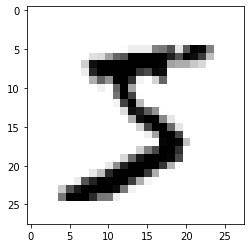

In [3]:

plt.imshow(x_train[0], cmap = 'binary')
plt.show()

In [4]:

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
y_train_encoded[0]




array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [5]:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

In [6]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)




In [7]:
epsilon = 1e-10
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

In [8]:
model = Sequential([
    Dense(100, activation = 'relu',input_shape = (784,)),
    Dense(100, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [9]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)





In [10]:
h = model.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 10
)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2172 - accuracy: 0.9332
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1048 - accuracy: 0.9672
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0770 - accuracy: 0.9752
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0620 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0514 - accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0457 - accuracy: 0.9852
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0390 - accuracy: 0.9875
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0368 - accuracy: 0.9883
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0305 - accuracy: 0.9895
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.02

In [11]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

print('test set accuracy: ', accuracy * 100)

preds = model.predict(x_test_norm)

313/313 [==============================] - 1s 2ms/step - loss: 0.1010 - accuracy: 0.9775
test set accuracy:  97.75000214576721
313/313 [==============================] - 1s 2ms/step


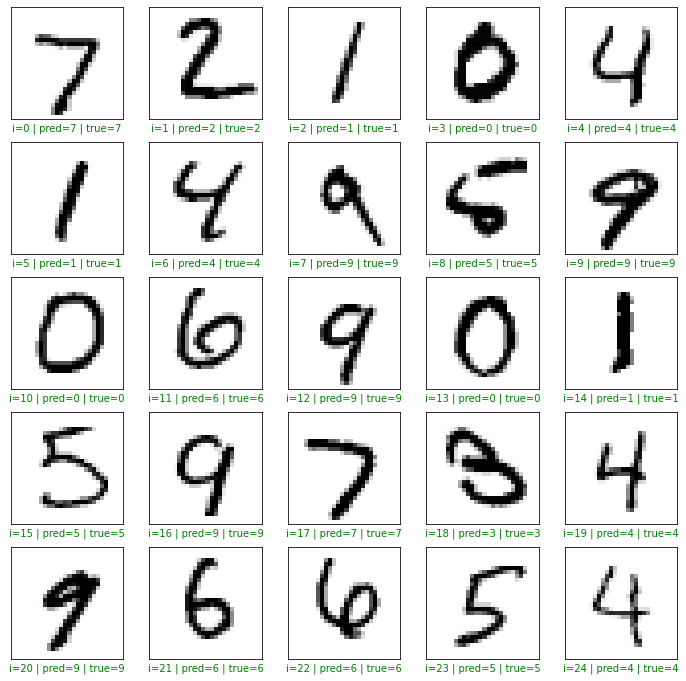

In [12]:
plt.figure(figsize = (12, 12))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

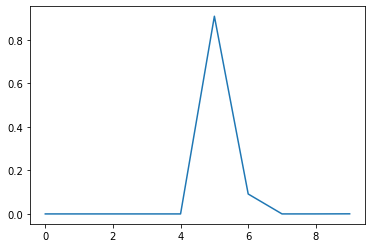

In [13]:
index = 8

plt.plot(preds[index])
plt.show()